# We would like to predict the price of a used car depending on its specification

# import the relevant libararies

In [4]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

In [8]:
raw_data = pd.read_csv('1.04. Linear regression.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing

### Exploring the descriptive statistics of the variables

In [11]:
raw_data.describe()

,Price,Mileage,EngineV,Year
count,4173.000000,4345.000000,4195.000000,4345.000000
mean,19418.746935,161.237284,2.790734,2006.550058
std,25584.242620,105.705797,5.066437,6.719097
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,86.000000,1.800000,2003.000000
50%,11500.000000,155.000000,2.200000,2008.000000
75%,21700.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [12]:
# we only got descriptive of numerical variables 

In [13]:
# now I will include argument in describe()

In [14]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [15]:
# now we have descriptive for categorical variables too!

In [16]:
# in count we can obeserve that the are not same for all columns so that 
# indicate that for missing values

In [17]:
# in unique with our current knowledge that would mean more than 300 dummies!

In [18]:
# when we merge top and freq we find out that registration for most of it yes
# Almost all of the entries are 'Yes' looks like this variable won't be useful

In [19]:
# A lot of the information from the model could be engineered from brand year and engineV so we won't be losing too much vartiability

# Determine the Variabels of Interest

In [20]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


# Dealing with missing vales

In [24]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

In [25]:
# I simply delete those missing value by rule of thumbs
# Rule of thumb: if you are removing <5% of the observation, you are free to just remove all that have missing values

In [26]:
data_no_mv = data.dropna(axis=0)

In [27]:
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


In [28]:
data_no_mv.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
dtype: int64

# Exploring the probability distribution functions

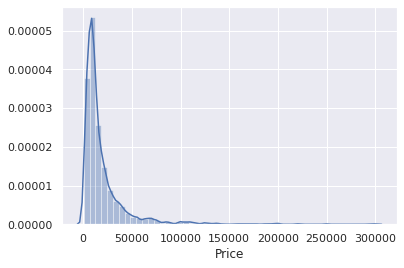

In [65]:
sns.distplot(data_no_mv['Price'])

# Dealing with Outliers

In [66]:
q = data_no_mv['Price'].quantile(0.99) 
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


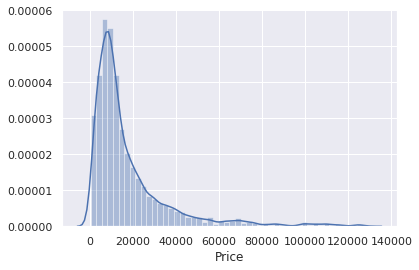

In [67]:
sns.distplot(data_1['Price'])

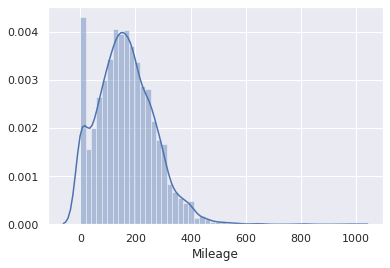

In [68]:
sns.distplot(data_1['Mileage'])

In [69]:
q = data_1['Mileage'].quantile(0.99) 
data_2 = data_1[data_1['Mileage']<q]
data_2.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3944,3944.000000,3944,3944.000000,3944.000000,3944,3944,3944.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,867,NaN,1511,NaN,NaN,1825,3576,NaN
mean,NaN,17933.880822,NaN,161.484026,2.747612,NaN,NaN,2006.389959
std,NaN,19008.212025,NaN,96.027108,4.980406,NaN,NaN,6.595986
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21376.250000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


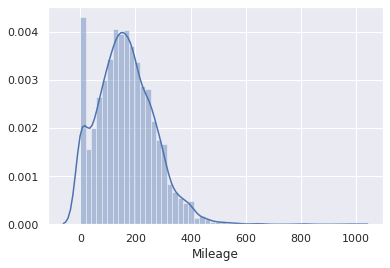

In [70]:
sns.distplot(data_1['Mileage'])

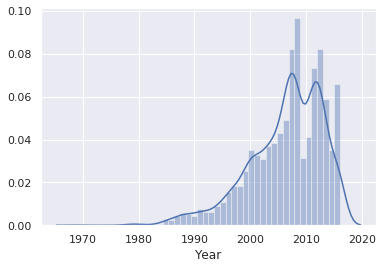

In [71]:
sns.distplot(data_1['Year'])

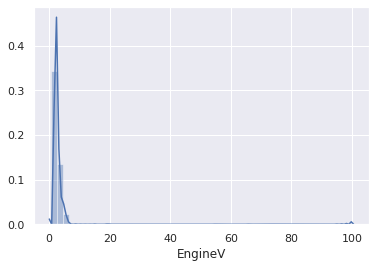

In [72]:
sns.distplot(data_2['EngineV'])

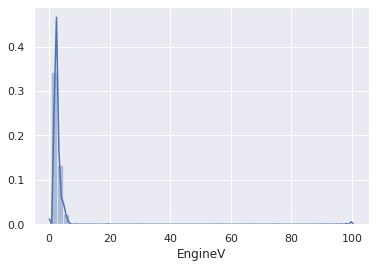

In [73]:
q = data_2['EngineV'].quantile(0.99)
data_3 = data_2[data_2['EngineV']<q]
sns.distplot(data_1['EngineV'])

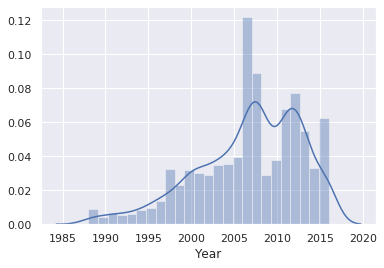

In [74]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]
sns.distplot(data_4['Year'])

In [75]:
data_cleaned = data_4.reset_index(drop=True)

In [76]:
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011
...,...,...,...,...,...,...,...,...
3835,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008
3836,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014
3837,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014
3838,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999


In [77]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3840,3840.000000,3840,3840.000000,3840.000000,3840,3840,3840.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1451,NaN,NaN,1806,3478,NaN
mean,NaN,18028.973987,NaN,160.860156,2.424310,NaN,NaN,2006.702865
std,NaN,18963.887320,NaN,95.742943,0.899824,NaN,NaN,6.117627
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11525.000000,NaN,157.500000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,226.000000,3.000000,NaN,NaN,2012.000000


# Checking the OLS assumptions

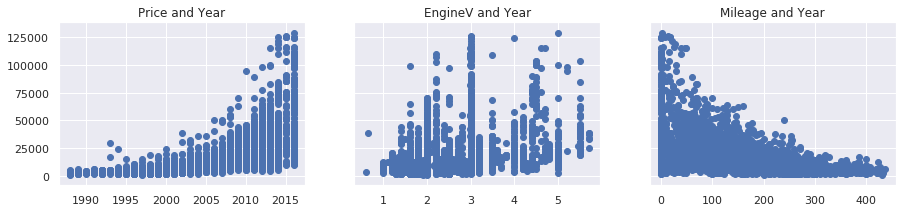

In [81]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['Price'])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned['EngineV'], data_cleaned['Price'])
ax2.set_title("EngineV and Year")
ax3.scatter(data_cleaned['Mileage'], data_cleaned['Price'])
ax3.set_title("Mileage and Year")
plt.show()

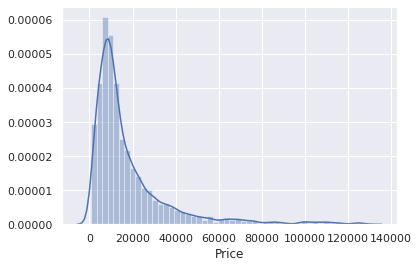

In [82]:
sns.distplot(data_cleaned['Price'])

# Relaxing the assumations

In [85]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...,...
3835,Volkswagen,11500.0,van,163,2.5,Diesel,yes,2008,9.350102
3836,Toyota,17900.0,sedan,35,1.6,Petrol,yes,2014,9.792556
3837,Mercedes-Benz,125000.0,sedan,9,3.0,Diesel,yes,2014,11.736069
3838,BMW,6500.0,sedan,1,3.5,Petrol,yes,1999,8.779557


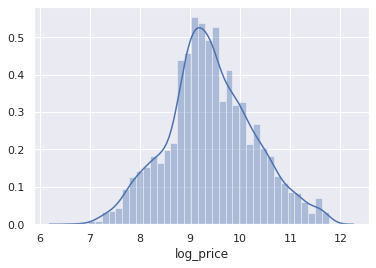

In [87]:
sns.distplot(data_cleaned['log_price'])

In [88]:
# time to plot them again with log_price instead of Price

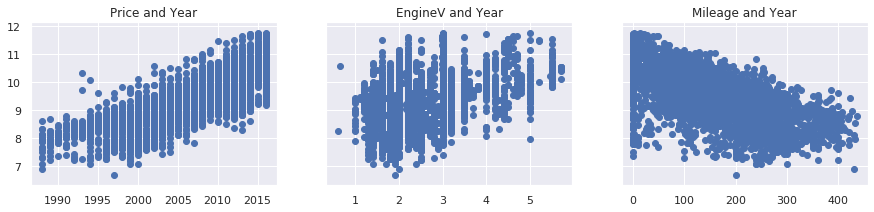

In [89]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey = True, figsize = (15,3))
ax1.scatter(data_cleaned['Year'], data_cleaned['log_price'])
ax1.set_title("Price and Year")
ax2.scatter(data_cleaned['EngineV'], data_cleaned['log_price'])
ax2.set_title("EngineV and Year")
ax3.scatter(data_cleaned['Mileage'], data_cleaned['log_price'])
ax3.set_title("Mileage and Year")
plt.show()

In [90]:
data_cleaned = data_cleaned.drop(['Price'], axis=1)

In [91]:
data_cleaned

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,2011,9.814656
...,...,...,...,...,...,...,...,...
3835,Volkswagen,van,163,2.5,Diesel,yes,2008,9.350102
3836,Toyota,sedan,35,1.6,Petrol,yes,2014,9.792556
3837,Mercedes-Benz,sedan,9,3.0,Diesel,yes,2014,11.736069
3838,BMW,sedan,1,3.5,Petrol,yes,1999,8.779557


# Multicollinearity

In [93]:
data_cleaned.columns

Index(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type', 'Registration',
       'Year', 'log_price'],
      dtype='object')

In [94]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [96]:
variables = data_cleaned[['Mileage','Year',
                          'EngineV']]
vvif = pd.DataFrame()
vvif['VIF'] = [vif(variables.values, i) for i in range(variables.shape[1])]
vvif['features'] = variables.columns

In [97]:
vvif

,VIF,features
0,3.798257,Mileage
1,10.823028,Year
2,8.262153,EngineV


In [98]:
data_no_multico = data_cleaned.drop(['Year'], axis=1)

In [99]:
data_no_multico

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656
...,...,...,...,...,...,...,...
3835,Volkswagen,van,163,2.5,Diesel,yes,9.350102
3836,Toyota,sedan,35,1.6,Petrol,yes,9.792556
3837,Mercedes-Benz,sedan,9,3.0,Diesel,yes,11.736069
3838,BMW,sedan,1,3.5,Petrol,yes,8.779557


# Create Dummy variables

In [102]:
data_with_dummies = pd.get_dummies(data_no_multico,drop_first=True)

In [103]:
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835,163,2.5,9.350102,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
3836,35,1.6,9.792556,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1
3837,9,3.0,11.736069,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
3838,1,3.5,8.779557,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1


# homework

### Rearrange a bit

In [104]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [105]:
cols = ['log_price','Mileage', 'EngineV','Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [106]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Linear regression model

#### Declare the input and the targets

In [109]:
target = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'], axis = 1)

### Scale the data

In [111]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

/home/radhey/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


StandardScaler(copy=True, with_mean=True, with_std=True)

In [112]:
inputs_scaled = scaler.transform(inputs)

/home/radhey/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


## Train Test Split

In [116]:
from sklearn.model_selection import train_test_split

In [120]:
x_train, x_test, y_train,y_test = train_test_split(inputs_scaled, target, test_size=0.2,random_state=36)

## Creating the regression 

In [122]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [123]:
y_hat = reg.predict(x_train)

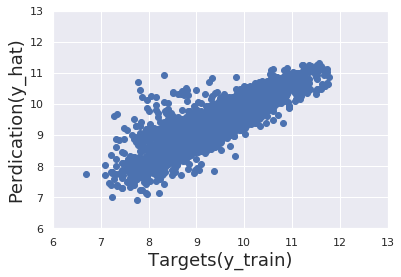

In [125]:
plt.scatter(y_train,y_hat)
plt.xlabel('Targets(y_train)',size=18)
plt.ylabel('Perdication(y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()


Text(0.5, 1.0, 'Residual PDF')

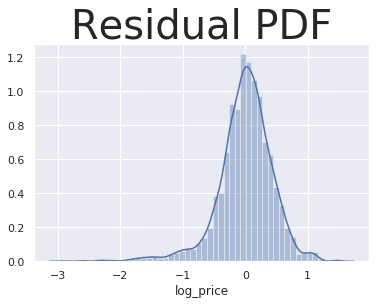

In [128]:
sns.distplot(y_train-y_hat)
plt.title("Residual PDF", size=40)

In [129]:
reg.score(x_train,y_train)

0.7498536551250543

### finding the weights and bias

In [131]:
reg.intercept_

9.408403142040038

In [132]:
reg.coef_

array([-0.45310671,  0.20769748,  0.02429005,  0.0281565 , -0.13053585,
       -0.16539965, -0.04868265, -0.07677608, -0.15071845, -0.0956611 ,
       -0.19257304, -0.12282051, -0.17083679, -0.12492247, -0.03170195,
       -0.14881564,  0.31991894])

In [133]:
reg.summary = pd.DataFrame(inputs.columns.values, columns=['features'])
reg.summary['Weights'] = reg.coef_
reg.summary

,features,Weights
0,Mileage,-0.453107
1,EngineV,0.207697
2,Brand_BMW,0.024290
3,Brand_Mercedes-Benz,0.028156
4,Brand_Mitsubishi,-0.130536
5,Brand_Renault,-0.165400
6,Brand_Toyota,-0.048683
7,Brand_Volkswagen,-0.076776
8,Body_hatch,-0.150718
9,Body_other,-0.095661


In [134]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

## Testing

In [135]:
y_hat_test = reg.predict(x_test)

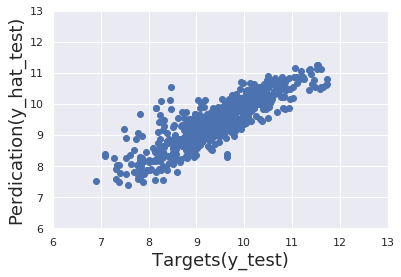

In [136]:
plt.scatter(y_test,y_hat_test)
plt.xlabel('Targets(y_test)',size=18)
plt.ylabel('Perdication(y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

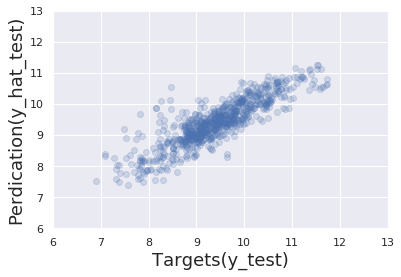

In [137]:
plt.scatter(y_test,y_hat_test, alpha=0.2)
plt.xlabel('Targets(y_test)',size=18)
plt.ylabel('Perdication(y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [138]:
df_pf = pd.DataFrame(y_hat_test, columns=['Predication'])
df_pf.head()

,Predication
0,9.607496
1,10.512011
2,10.048593
3,9.394661
4,7.803754


In [139]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Predication'])
df_pf.head()

,Predication
0,14875.869180
1,36754.315523
2,23123.237451
3,12024.015086
4,2449.780146


In [141]:
df_pf['Target'] = np.exp(y_test)
df_pf.head

<bound method NDFrame.head of       Predication   Target
0    14875.869180      NaN
1    36754.315523      NaN
2    23123.237451      NaN
3    12024.015086  23000.0
4     2449.780146      NaN
..            ...      ...
763  25095.858201   8600.0
764  17543.042980      NaN
765  11359.856790  22900.0
766   4158.893045      NaN
767   8673.762309      NaN

[768 rows x 2 columns]>

In [142]:
y_test

3135     9.510445
2934    10.478836
717      9.738023
1770     9.341719
93       8.160518
          ...    
1514     9.185023
171      9.825526
800      9.775370
1497     7.090077
3404     9.093807
Name: log_price, Length: 768, dtype: float64

In [144]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0     9.510445
1    10.478836
2     9.738023
3     9.341719
4     8.160518
Name: log_price, dtype: float64

In [145]:
df_pf['Target'] = np.exp(y_test)
df_pf.head

<bound method NDFrame.head of       Predication    Target
0    14875.869180  13500.00
1    36754.315523  35555.00
2    23123.237451  16950.00
3    12024.015086  11403.99
4     2449.780146   3500.00
..            ...       ...
763  25095.858201   9750.00
764  17543.042980  18500.00
765  11359.856790  17595.00
766   4158.893045   1200.00
767   8673.762309   8900.00

[768 rows x 2 columns]>

In [146]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Predication']

In [149]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)

In [151]:
df_pf

,Predication,Target,Residual,Difference%
0,14875.869180,13500.00,-1375.869180,10.191624
1,36754.315523,35555.00,-1199.315523,3.373128
2,23123.237451,16950.00,-6173.237451,36.420280
3,12024.015086,11403.99,-620.025086,5.436914
4,2449.780146,3500.00,1050.219854,30.006282
...,...,...,...,...
763,25095.858201,9750.00,-15345.858201,157.393417
764,17543.042980,18500.00,956.957020,5.172741
765,11359.856790,17595.00,6235.143210,35.437017
766,4158.893045,1200.00,-2958.893045,246.574420


In [157]:
df_pf.describe()

,Predication,Target,Residual,Difference%
count,768.00,768.00,768.00,768.00
mean,15790.11,17642.16,1852.05,36.15
std,12137.40,18287.98,10570.94,58.36
min,1636.69,999.00,-33104.68,0.14
25%,7826.93,7286.25,-2148.34,11.12
50%,12165.49,11994.50,143.21,23.28
75%,19726.16,20800.00,3232.73,39.11
max,76338.92,125000.00,83611.21,689.68


In [155]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format',lambda x:'%.2f' %x)
df_pf.sort_values(by=['Difference%'])

,Predication,Target,Residual,Difference%
120,13618.82,13600.00,-18.82,0.14
317,30556.44,30500.00,-56.44,0.19
252,4007.81,4000.00,-7.81,0.20
405,43997.56,43900.00,-97.56,0.22
88,12059.93,12100.00,40.07,0.33
693,22393.17,22500.00,106.83,0.47
166,11440.30,11500.00,59.70,0.52
292,12428.64,12499.00,70.36,0.56
275,9042.69,9100.00,57.31,0.63
737,36216.02,36500.00,283.98,0.78


# Thank you !